In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
data=pd.read_csv(r'C:\Users\ADMIN\OneDrive\Desktop\ICT PROJECT WORK\CREDIT CARD LEAD PREDICTION\train.csv')

In [ ]:
data

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0
...,...,...,...,...,...,...,...,...,...,...,...
245720,BPAWWXZN,Male,51,RG284,Self_Employed,X3,109,NaN,1925586,No,0
245721,HFNB7JY8,Male,27,RG268,Salaried,X1,15,No,862952,Yes,0
245722,GEHAUCWT,Female,26,RG281,Salaried,X1,13,No,670659,No,0
245723,GE7V8SAH,Female,28,RG273,Salaried,X1,31,No,407504,No,0


In [ ]:
data=data.drop('ID',axis=1)

In [ ]:
#FINDING AND HANDLING MISSING VALUES

In [ ]:
data.isna().sum()

Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [ ]:
# Assuming 'data' is the DataFrame that contains the data

# Filter the rows where 'Lead' is equal to 1
lead_1_data = data[data['Is_Lead'] == 1]

# Get the value counts of 'Credit_Product' in the filtered data
credit_product_counts = lead_1_data['Credit_Product'].value_counts()

print(credit_product_counts)

Yes    22690
No     10623
Name: Credit_Product, dtype: int64


In [ ]:
lead_1_data['Credit_Product'].isna().sum()

24975

In [ ]:
# Assuming 'data' is the DataFrame that contains the data

# Filter the rows where 'Lead' is equal to 0
lead_0_data = data[data['Is_Lead'] == 0]

# Get the value counts of 'Credit_Product' in the filtered data
credit_product_counts = lead_0_data['Credit_Product'].value_counts()

print(credit_product_counts)

No     133734
Yes     49353
Name: Credit_Product, dtype: int64


In [ ]:
lead_0_data['Credit_Product'].isna().sum()

4350

In [ ]:
# Assuming 'data' is the DataFrame that contains both  lead_1_data and lead_0_data

# Fill missing values in 'Credit_Product' column with 'Yes' where Lead is 1
data.loc[data['Is_Lead']==1,'Credit_Product']=data.loc[data['Is_Lead'] == 1, 'Credit_Product'].fillna('Yes')

# Fill missing values in 'Credit_Product' column with 'No' where Lead is 0
data.loc[data['Is_Lead']==0,'Credit_Product']=data.loc[data['Is_Lead'] == 0, 'Credit_Product'].fillna('No')


In [ ]:
data.isna().sum()

Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

In [ ]:
data['Credit_Product'].value_counts()

No     148707
Yes     97018
Name: Credit_Product, dtype: int64

In [ ]:
#Detection of Outliers:

Text(0.5, 1.0, 'Box plot of Avg_Account_Balance')

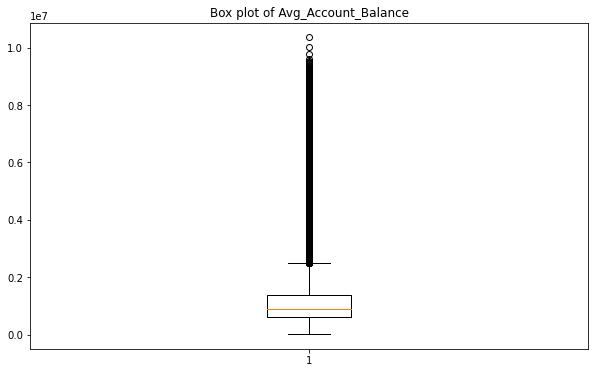

In [ ]:
# avg account balance:
plt.boxplot(data['Avg_Account_Balance'])
plt.title('Box plot of Avg_Account_Balance')

In [ ]:
q1 = np.percentile(data['Avg_Account_Balance'], 25)
q2 = np.percentile(data['Avg_Account_Balance'], 50)
q3 = np.percentile(data['Avg_Account_Balance'], 75)

In [ ]:
iqr=q3-q1

In [ ]:
low_limit = q1 - 1.5*iqr
upr_limit = q3 + 1.5*iqr

In [ ]:
low_limit

-539224.0

In [ ]:
upr_limit

2510200.0

In [ ]:
outlier=[]
for x in data['Avg_Account_Balance']:
    if x>upr_limit or x<low_limit:
        outlier.append(x)

In [ ]:
outlier

[2521592,
 2824468,
 6278683,
 5878049,
 2952343,
 5950700,
 2601656,
 3949713,
 3123134,
 2729727,
 2555270,
 3850567,
 2944493,
 2933466,
 3831583,
 3540669,
 2561687,
 2872448,
 3800193,
 3051160,
 3278386,
 4125595,
 3005209,
 7880380,
 3195126,
 2768985,
 3449426,
 3646543,
 5857499,
 5182372,
 3969266,
 5273143,
 2983564,
 5752728,
 2772937,
 2938246,
 2544189,
 2790799,
 3768268,
 3929741,
 3287900,
 2919013,
 6588376,
 2563600,
 2826195,
 4067059,
 2741226,
 5420269,
 3459082,
 3879456,
 3578868,
 6722899,
 2662399,
 2845178,
 3407498,
 8256124,
 3441282,
 2612888,
 2777885,
 2772252,
 3413399,
 3798066,
 2618664,
 4425329,
 2756970,
 4419980,
 4793246,
 3148143,
 3116121,
 2862943,
 2602546,
 3440188,
 2727333,
 5026275,
 4948862,
 4818620,
 4210198,
 4022185,
 2818256,
 2857985,
 3649275,
 2708741,
 2720703,
 3907100,
 2730991,
 4597535,
 2689143,
 2629086,
 3820574,
 3296827,
 3033440,
 3940715,
 2574218,
 2696486,
 7414269,
 2948374,
 2724405,
 2934668,
 4433597,
 2984988,


In [ ]:
ind1 = data['Avg_Account_Balance']>upr_limit
ind2= data['Avg_Account_Balance']<low_limit

In [ ]:
data.loc[ind1].index

Int64Index([    35,     71,    113,    184,    205,    211,    214,    218,
               240,    262,
            ...
            245554, 245560, 245601, 245610, 245629, 245638, 245653, 245661,
            245676, 245701],
           dtype='int64', length=14612)

In [ ]:
data.loc[ind2].index #no low outliers

Int64Index([], dtype='int64')

In [ ]:
data[ind1]['Avg_Account_Balance']

35        2521592
71        2824468
113       6278683
184       5878049
205       2952343
           ...   
245638    5396737
245653    6900312
245661    3566719
245676    2769973
245701    9491986
Name: Avg_Account_Balance, Length: 14612, dtype: int64

In [ ]:
#ENCODING

In [ ]:
data['Region_Code'] = data['Region_Code'].str.replace('RG', '').astype(int)
data['Channel_Code'] = data['Channel_Code'].str.replace('X', '').astype(int)

In [ ]:
data

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,Female,73,268,Other,3,43,No,1045696,No,0
1,Female,30,277,Salaried,1,32,No,581988,No,0
2,Female,56,268,Self_Employed,3,26,No,1484315,Yes,0
3,Male,34,270,Salaried,1,19,No,470454,No,0
4,Female,30,282,Salaried,1,33,No,886787,No,0
...,...,...,...,...,...,...,...,...,...,...
245720,Male,51,284,Self_Employed,3,109,No,1925586,No,0
245721,Male,27,268,Salaried,1,15,No,862952,Yes,0
245722,Female,26,281,Salaried,1,13,No,670659,No,0
245723,Female,28,273,Salaried,1,31,No,407504,No,0


In [ ]:
data.dtypes

Age                           int64
Region_Code                   int32
Channel_Code                  int32
Vintage                       int64
Avg_Account_Balance           int64
Is_Lead                       int64
Gender_Male                 float64
Occupation_Other            float64
Occupation_Salaried         float64
Occupation_Self_Employed    float64
Is_Active_Yes               float64
Credit_Product_Yes          float64
dtype: object

In [ ]:
#ONE HOT ENCODING

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Select the categorical columns to encode
categorical_columns = ['Gender', 'Occupation', 'Is_Active', 'Credit_Product']

# Create a OneHotEncoder instance
encoder = OneHotEncoder(drop='first', sparse=False)

# Fit and transform the encoder on the selected categorical columns
encoded_columns = encoder.fit_transform(data[categorical_columns])

# Create a DataFrame from the encoded_columns array with column names
encoded_data = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(categorical_columns))

# Drop the original categorical columns from 'data'
data.drop(categorical_columns, axis=1, inplace=True)

# Concatenate the original 'data' DataFrame with the encoded_data DataFrame
data = pd.concat([data, encoded_data], axis=1)

# Show the updated 'data' DataFrame
data

,Age,Region_Code,Channel_Code,Vintage,Avg_Account_Balance,Is_Lead,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Is_Active_Yes,Credit_Product_Yes
0,73,268,3,43,1045696,0,0.0,1.0,0.0,0.0,0.0,0.0
1,30,277,1,32,581988,0,0.0,0.0,1.0,0.0,0.0,0.0
2,56,268,3,26,1484315,0,0.0,0.0,0.0,1.0,1.0,0.0
3,34,270,1,19,470454,0,1.0,0.0,1.0,0.0,0.0,0.0
4,30,282,1,33,886787,0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
245720,51,284,3,109,1925586,0,1.0,0.0,0.0,1.0,0.0,0.0
245721,27,268,1,15,862952,0,1.0,0.0,1.0,0.0,1.0,0.0
245722,26,281,1,13,670659,0,0.0,0.0,1.0,0.0,0.0,0.0
245723,28,273,1,31,407504,0,0.0,0.0,1.0,0.0,0.0,0.0


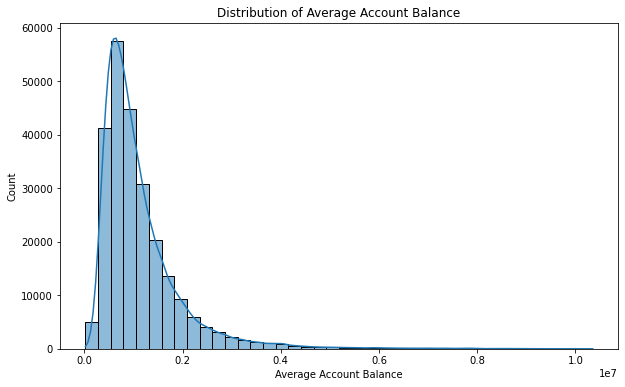

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Avg_Account_Balance'], bins=40, kde=True)
plt.xlabel('Average Account Balance')
plt.ylabel('Count')
plt.title('Distribution of Average Account Balance')
plt.show()

In [ ]:
#HANDLING OUTLIERS

# HANDLING OUTLIERS**

In [ ]:
plt.rcParams['figure.figsize'] = (10, 6)  # Set the default figure size (width, height) in inches


In [ ]:
#transformation
#log transformation:

credit_card_data = data.copy()
# Log transformation on the "avg_account_balance" column
credit_card_data["Avg_Account_Balance"] = credit_card_data["Avg_Account_Balance"].map(lambda i: np.log(i) if i > 0 else 0)
# Print the DataFrame to observe the transformation
print(credit_card_data)

        Age  Region_Code  Channel_Code  Vintage  Avg_Account_Balance  Is_Lead  \
0        73          268             3       43            13.860193        0   
1        30          277             1       32            13.274205        0   
2        56          268             3       26            14.210464        0   
3        34          270             1       19            13.061453        0   
4        30          282             1       33            13.695360        0   
...     ...          ...           ...      ...                  ...      ...   
245720   51          284             3      109            14.470741        0   
245721   27          268             1       15            13.668114        0   
245722   26          281             1       13            13.416016        0   
245723   28          273             1       31            12.917806        0   
245724   29          269             1       21            13.937087        0   

        Gender_Male  Occupa

Text(0.5, 1.0, 'Box Plot of Log-Transformed Avg_Account_Balance')

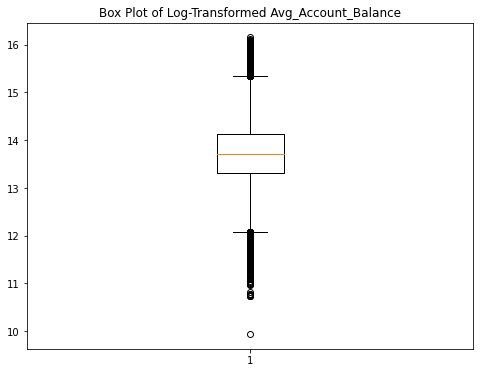

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(credit_card_data['Avg_Account_Balance'])
plt.title('Box Plot of Log-Transformed Avg_Account_Balance')

In [ ]:
credit_card_data

,Age,Region_Code,Channel_Code,Vintage,Avg_Account_Balance,Is_Lead,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Is_Active_Yes,Credit_Product_Yes
0,73,268,3,43,13.860193,0,0.0,1.0,0.0,0.0,0.0,0.0
1,30,277,1,32,13.274205,0,0.0,0.0,1.0,0.0,0.0,0.0
2,56,268,3,26,14.210464,0,0.0,0.0,0.0,1.0,1.0,0.0
3,34,270,1,19,13.061453,0,1.0,0.0,1.0,0.0,0.0,0.0
4,30,282,1,33,13.695360,0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
245720,51,284,3,109,14.470741,0,1.0,0.0,0.0,1.0,0.0,0.0
245721,27,268,1,15,13.668114,0,1.0,0.0,1.0,0.0,1.0,0.0
245722,26,281,1,13,13.416016,0,0.0,0.0,1.0,0.0,0.0,0.0
245723,28,273,1,31,12.917806,0,0.0,0.0,1.0,0.0,0.0,0.0


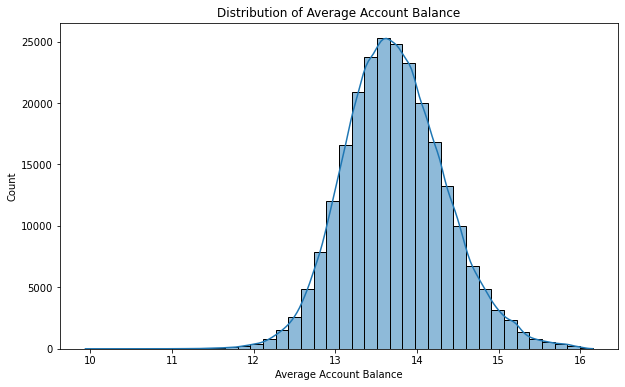

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(credit_card_data['Avg_Account_Balance'], bins=40, kde=True)
plt.xlabel('Average Account Balance')
plt.ylabel('Count')
plt.title('Distribution of Average Account Balance')
plt.show()

In [ ]:
#WINSORIZATION

In [ ]:
# Create a copy of the original DataFrame to work with
winsorized_data = data.copy()

# Select the column to handle outliers ('Avg_Account_Balance' in this case)
column_name = 'Avg_Account_Balance'

# Define the lower and upper percentiles for winsorization (e.g., 5th and 95th percentiles)
lower_percentile = 5
upper_percentile = 90

# Calculate the percentiles
lower_bound = np.percentile(winsorized_data['Avg_Account_Balance'], 5)
upper_bound = np.percentile(winsorized_data['Avg_Account_Balance'], 90)
# Winsorize the data by capping the extreme values
winsorized_data['Avg_Account_Balance'] = winsorized_data['Avg_Account_Balance'].clip(lower_bound, upper_bound)


In [ ]:
winsorized_data

,Age,Region_Code,Channel_Code,Vintage,Avg_Account_Balance,Is_Lead,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Is_Active_Yes,Credit_Product_Yes
0,73,268,3,43,1045696.0,0,0.0,1.0,0.0,0.0,0.0,0.0
1,30,277,1,32,581988.0,0,0.0,0.0,1.0,0.0,0.0,0.0
2,56,268,3,26,1484315.0,0,0.0,0.0,0.0,1.0,1.0,0.0
3,34,270,1,19,470454.0,0,1.0,0.0,1.0,0.0,0.0,0.0
4,30,282,1,33,886787.0,0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
245720,51,284,3,109,1925586.0,0,1.0,0.0,0.0,1.0,0.0,0.0
245721,27,268,1,15,862952.0,0,1.0,0.0,1.0,0.0,1.0,0.0
245722,26,281,1,13,670659.0,0,0.0,0.0,1.0,0.0,0.0,0.0
245723,28,273,1,31,407504.0,0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
winsorized_data['Avg_Account_Balance'].max()

2043591.0

In [ ]:
winsorized_data['Avg_Account_Balance'].min()

352992.8

Text(0.5, 1.0, 'Box plot of Avg_Account_Balance')

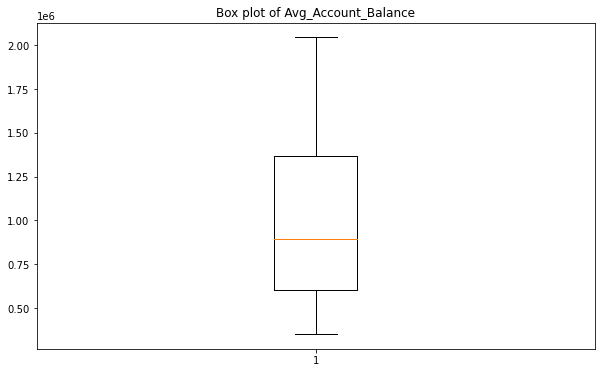

In [ ]:
plt.boxplot(winsorized_data['Avg_Account_Balance'])
plt.title('Box plot of Avg_Account_Balance')

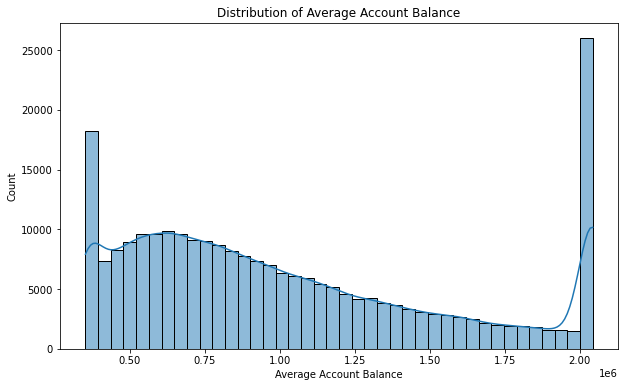

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(winsorized_data['Avg_Account_Balance'], bins=40, kde=True)
plt.xlabel('Average Account Balance')
plt.ylabel('Count')
plt.title('Distribution of Average Account Balance')
plt.show()

In [ ]:
#BINNING

In [ ]:
#The pd.cut() function is used to perform the actual binning operation. It creates categorical bins based on the specified 'bins' and 'labels'. The 'Avg_Account_Balance' column is divided into intervals defined by the 'bins' list, and each row's value is assigned the corresponding label from the 'labels' list. The right=False argument means that the right bin edge should be excluded from the interval, making the intervals left-closed and right-open.
#The  above given code specifically performs binning on the 'Avg_Account_Balance' column, which discretizes the continuous variable into discrete intervals (bins) based on the specified bin edges and labels.




In [ ]:
##Detect and handle outliers after binning:


In [ ]:
outlier_handled_data1 = data.copy()

# Step 2: Define the new bin edges (customize this based on your data)
bins = [10000, 50000, 100000, 500000, 1000000, 3000000, 8000000]

# Step 3: Define the corresponding labels for the bins
labels = ['10k-50k', '50k-100k', '100k-500k', '500k-1M', '1M-3M', '3M-8M']

# Step 4: Binning the 'Avg_Account_Balance' column with the updated bins
outlier_handled_data1 ['Avg_Account_Balance_Binned'] = pd.cut(outlier_handled_data1['Avg_Account_Balance'], bins=bins, labels=labels, right=False)

# Step 5: Detect outliers on the 'Avg_Account_Balance_Binned' column after binning
Q1 = outlier_handled_data1 ['Avg_Account_Balance'].quantile(0.25)
Q3 = outlier_handled_data1 ['Avg_Account_Balance'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 6: Replace outliers with the corresponding bin bounds
outlier_handled_data1['Avg_Account_Balance'] = outlier_handled_data1['Avg_Account_Balance'].clip(lower=lower_bound, upper=upper_bound)


In [ ]:
outlier_handled_data1

,Age,Region_Code,Channel_Code,Vintage,Avg_Account_Balance,Is_Lead,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Is_Active_Yes,Credit_Product_Yes,Avg_Account_Balance_Binned
0,73,268,3,43,1045696.0,0,0.0,1.0,0.0,0.0,0.0,0.0,1M-3M
1,30,277,1,32,581988.0,0,0.0,0.0,1.0,0.0,0.0,0.0,500k-1M
2,56,268,3,26,1484315.0,0,0.0,0.0,0.0,1.0,1.0,0.0,1M-3M
3,34,270,1,19,470454.0,0,1.0,0.0,1.0,0.0,0.0,0.0,100k-500k
4,30,282,1,33,886787.0,0,0.0,0.0,1.0,0.0,0.0,0.0,500k-1M
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245720,51,284,3,109,1925586.0,0,1.0,0.0,0.0,1.0,0.0,0.0,1M-3M
245721,27,268,1,15,862952.0,0,1.0,0.0,1.0,0.0,1.0,0.0,500k-1M
245722,26,281,1,13,670659.0,0,0.0,0.0,1.0,0.0,0.0,0.0,500k-1M
245723,28,273,1,31,407504.0,0,0.0,0.0,1.0,0.0,0.0,0.0,100k-500k


In [ ]:
# this step ensures that outliers are "clipped" or restricted to the maximum and minimum values allowed within the range defined by the bin bounds.

In [ ]:
outlier_handled_data1['Avg_Account_Balance'].max()

2510200.0

In [ ]:
outlier_handled_data1['Avg_Account_Balance'].min()

20790.0

In [ ]:
outlier_handled_data1.dtypes

Age                              int64
Region_Code                      int32
Channel_Code                     int32
Vintage                          int64
Avg_Account_Balance            float64
Is_Lead                          int64
Gender_Male                    float64
Occupation_Other               float64
Occupation_Salaried            float64
Occupation_Self_Employed       float64
Is_Active_Yes                  float64
Credit_Product_Yes             float64
Avg_Account_Balance_Binned    category
dtype: object

In [ ]:
#avoid multicollinearity issues between the continuous and binned features. drop either of two on basis of  specific machine learning algorithms you plan to use,

Text(0.5, 1.0, 'Box plot of Avg_Account_Balance')

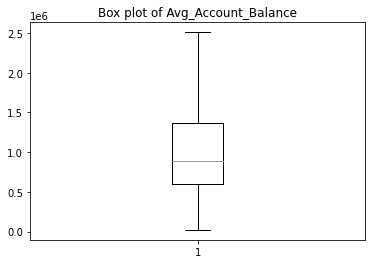

In [ ]:
plt.boxplot(outlier_handled_data1['Avg_Account_Balance'])
plt.title('Box plot of Avg_Account_Balance')

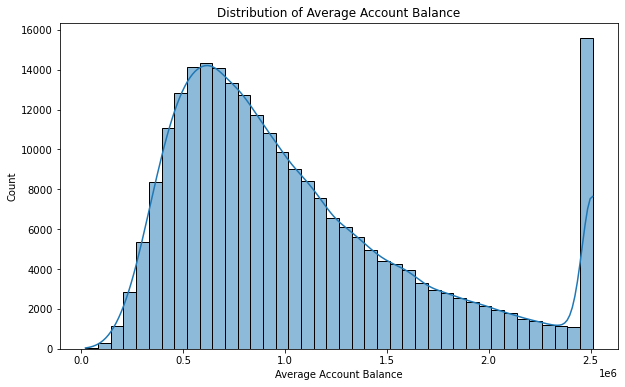

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(outlier_handled_data1['Avg_Account_Balance'], bins=40, kde=True)
plt.xlabel('Average Account Balance')
plt.ylabel('Count')
plt.title('Distribution of Average Account Balance')
plt.show()

In [ ]:
#IMPUTATION

In [ ]:

# Create a copy of the original DataFrame for imputation
imputed_data = data.copy()

# Select the column to handle outliers ('Avg_Account_Balance' in this case)
column_name = 'Avg_Account_Balance'

# Calculate the median of the column excluding outliers
median_value = imputed_data[ 'Avg_Account_Balance'].median()

# Define the threshold for outlier detection (customize this based on your data)
outlier_threshold = 1    #NO IDEA HOW TO FIX THIS (2/3 NOT RECMMENDED IF RIGHT SKEWED DATA)

# Detect outliers using the z-score method and replace them with the median value
z_scores = (imputed_data['Avg_Account_Balance'] - median_value) / imputed_data['Avg_Account_Balance'].std()
imputed_data['Avg_Account_Balance'] = imputed_data['Avg_Account_Balance'].where(abs(z_scores) < outlier_threshold, median_value)



In [ ]:
z_scores

0         0.177147
1        -0.366514
2         0.691393
3        -0.497279
4        -0.009161
            ...   
245720    1.208748
245721   -0.037106
245722   -0.262554
245723   -0.571082
245724    0.275138
Name: Avg_Account_Balance, Length: 245725, dtype: float64

In [ ]:
# Find the outliers using the Z-Score method
outliers = imputed_data[abs(z_scores) > outlier_threshold]

# Display the rows containing the outliers
print(outliers)

        Age  Region_Code  Channel_Code  Vintage  Avg_Account_Balance  Is_Lead  \
9        55          268             2       49             894601.0        0   
16       46          268             3       97             894601.0        1   
17       59          283             3       15             894601.0        1   
35       29          284             1       26             894601.0        0   
43       61          254             2      103             894601.0        1   
...     ...          ...           ...      ...                  ...      ...   
245665   44          281             3       92             894601.0        1   
245672   35          268             1       32             894601.0        0   
245676   35          253             2       61             894601.0        0   
245701   32          277             1       13             894601.0        0   
245720   51          284             3      109             894601.0        0   

        Gender_Male  Occupa

In [ ]:
median_value

894601.0

In [ ]:
imputed_data

,Age,Region_Code,Channel_Code,Vintage,Avg_Account_Balance,Is_Lead,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Is_Active_Yes,Credit_Product_Yes
0,73,268,3,43,1045696.0,0,0.0,1.0,0.0,0.0,0.0,0.0
1,30,277,1,32,581988.0,0,0.0,0.0,1.0,0.0,0.0,0.0
2,56,268,3,26,1484315.0,0,0.0,0.0,0.0,1.0,1.0,0.0
3,34,270,1,19,470454.0,0,1.0,0.0,1.0,0.0,0.0,0.0
4,30,282,1,33,886787.0,0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
245720,51,284,3,109,894601.0,0,1.0,0.0,0.0,1.0,0.0,0.0
245721,27,268,1,15,862952.0,0,1.0,0.0,1.0,0.0,1.0,0.0
245722,26,281,1,13,670659.0,0,0.0,0.0,1.0,0.0,0.0,0.0
245723,28,273,1,31,407504.0,0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
count_target_value = (imputed_data['Avg_Account_Balance'] == median_value).sum()


In [ ]:
count_target_value

36270

Text(0.5, 1.0, 'Boxplot of Avg_Account_Balance')

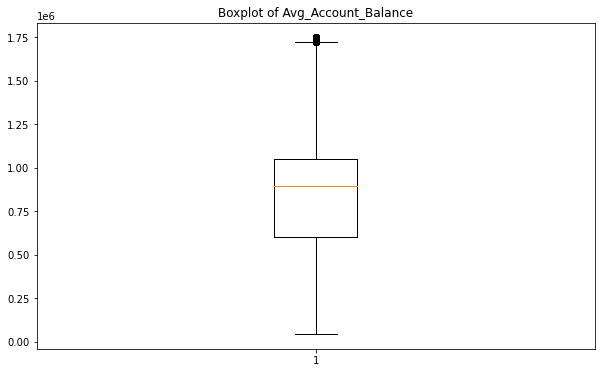

In [ ]:
plt.boxplot(imputed_data['Avg_Account_Balance'])
plt.title("Boxplot of Avg_Account_Balance")

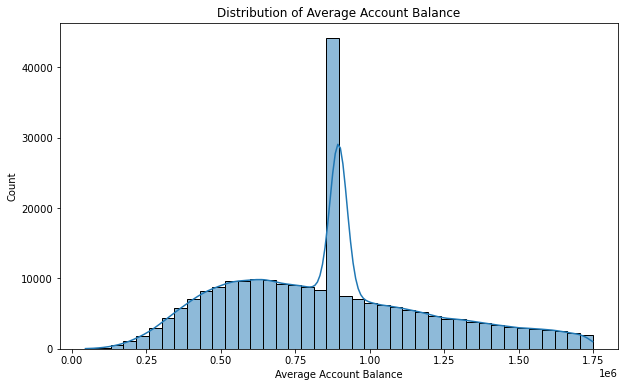

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(imputed_data['Avg_Account_Balance'], bins=40, kde=True)
plt.xlabel('Average Account Balance')
plt.ylabel('Count')
plt.title('Distribution of Average Account Balance')
plt.show()

In [ ]:
#imputation 2

In [ ]:
# Create a copy of the original DataFrame for imputation
imputed_data1 = data.copy()

# Select the column to handle outliers ('Avg_Account_Balance' in this case)
column_name = 'Avg_Account_Balance'

# Calculate the first quartile (25th percentile) and third quartile (75th percentile) of the column
Q1 = imputed_data1[column_name].quantile(0.25)
Q3 = imputed_data1[column_name].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with the median value
median_value = imputed_data1[column_name].median()
imputed_data1[column_name] = imputed_data1[column_name].where((imputed_data1[column_name] >= lower_bound) & (imputed_data1[column_name] <= upper_bound), median_value)


In [ ]:
imputed_data1

,Age,Region_Code,Channel_Code,Vintage,Avg_Account_Balance,Is_Lead,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Is_Active_Yes,Credit_Product_Yes
0,73,268,3,43,1045696.0,0,0.0,1.0,0.0,0.0,0.0,0.0
1,30,277,1,32,581988.0,0,0.0,0.0,1.0,0.0,0.0,0.0
2,56,268,3,26,1484315.0,0,0.0,0.0,0.0,1.0,1.0,0.0
3,34,270,1,19,470454.0,0,1.0,0.0,1.0,0.0,0.0,0.0
4,30,282,1,33,886787.0,0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
245720,51,284,3,109,1925586.0,0,1.0,0.0,0.0,1.0,0.0,0.0
245721,27,268,1,15,862952.0,0,1.0,0.0,1.0,0.0,1.0,0.0
245722,26,281,1,13,670659.0,0,0.0,0.0,1.0,0.0,0.0,0.0
245723,28,273,1,31,407504.0,0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
median_value

894601.0

In [ ]:
lower_bound

-539224.0

In [ ]:
upper_bound

2510200.0

In [ ]:
imputed_data1['Avg_Account_Balance'].max()

2509800.0

In [ ]:
imputed_data1['Avg_Account_Balance'].min()

20790.0

In [ ]:
count_target_value = (imputed_data1['Avg_Account_Balance'] == median_value).sum()
#This count represents the number of occurrences of the median_value in the 'Avg_Account_Balance' column.

In [ ]:
count_target_value

14619

Text(0.5, 1.0, 'Boxplot of Avg_Account_Balance')

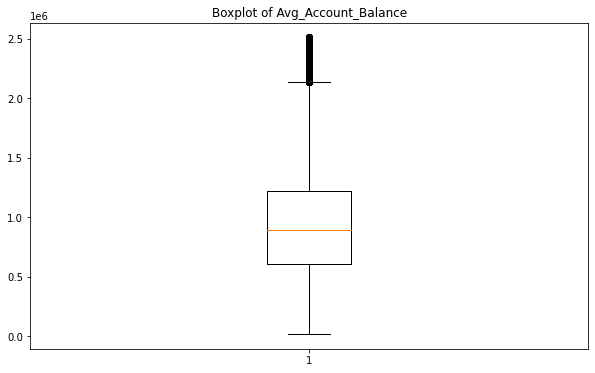

In [ ]:
plt.boxplot(imputed_data1['Avg_Account_Balance'])
plt.title("Boxplot of Avg_Account_Balance")

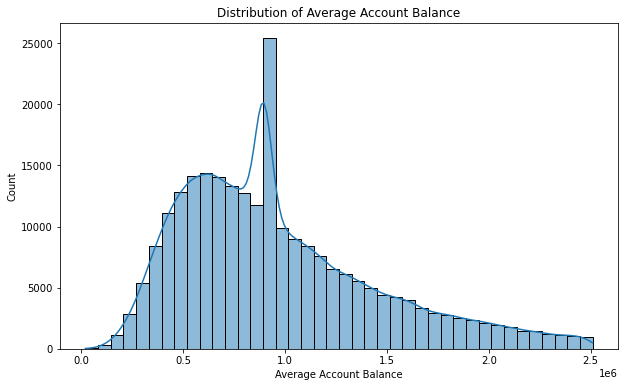

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(imputed_data1['Avg_Account_Balance'], bins=40, kde=True)
plt.xlabel('Average Account Balance')
plt.ylabel('Count')
plt.title('Distribution of Average Account Balance')
plt.show()

In [ ]:
#capping and flooring
duplicate_data = data.copy()
# Select the column to handle outliers ('Avg_Account_Balance' in this case)
column_name = 'Avg_Account_Balance'

# Define the lower and upper bounds for capping
lower_bound = 20000  # Replace with your desired lower bound
upper_bound = 8000000  # Replace with your desired upper bound

# Apply capping to the 'Avg_Account_Balance' column
duplicate_data['Avg_Account_Balance'] = duplicate_data['Avg_Account_Balance'].clip(lower_bound, upper_bound)



In [ ]:
duplicate_data

,Age,Region_Code,Channel_Code,Vintage,Avg_Account_Balance,Is_Lead,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Is_Active_Yes,Credit_Product_Yes
0,73,268,3,43,1045696,0,0.0,1.0,0.0,0.0,0.0,0.0
1,30,277,1,32,581988,0,0.0,0.0,1.0,0.0,0.0,0.0
2,56,268,3,26,1484315,0,0.0,0.0,0.0,1.0,1.0,0.0
3,34,270,1,19,470454,0,1.0,0.0,1.0,0.0,0.0,0.0
4,30,282,1,33,886787,0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
245720,51,284,3,109,1925586,0,1.0,0.0,0.0,1.0,0.0,0.0
245721,27,268,1,15,862952,0,1.0,0.0,1.0,0.0,1.0,0.0
245722,26,281,1,13,670659,0,0.0,0.0,1.0,0.0,0.0,0.0
245723,28,273,1,31,407504,0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
duplicate_data['Avg_Account_Balance'].max()

8000000

In [ ]:
duplicate_data['Avg_Account_Balance'].min()

20790

In [ ]:
#just for understanding
# Define the limit for filtering values
limit = 8000000 # Customize this limit based on your requirement

# Use boolean indexing to filter values above the limit
values_above_limit = data[data['Avg_Account_Balance'] > limit]

# Display the filtered DataFrame
print(values_above_limit)


        Age  Region_Code  Channel_Code  Vintage  Avg_Account_Balance  Is_Lead  \
1145     59          268             3       50              8256124        0   
6195     43          254             2       19              8588270        0   
8258     60          268             1       21              8741290        1   
9050     72          283             3      103              8781245        1   
10167    62          261             3       55              8348854        1   
...     ...          ...           ...      ...                  ...      ...   
242717   28          284             1       20              9039459        0   
242889   47          284             2       25              8183118        0   
243818   66          283             3      109              8435295        1   
245365   25          254             1       15              9279729        0   
245701   32          277             1       13              9491986        0   

        Gender_Male  Occupa

In [ ]:
# Check if outliers have been replaced
outliers_replaced = (duplicate_data['Avg_Account_Balance'] != data['Avg_Account_Balance'])

# Display the rows where outliers have been replaced
print(duplicate_data[outliers_replaced])

        Age  Region_Code  Channel_Code  Vintage  Avg_Account_Balance  Is_Lead  \
1145     59          268             3       50              8000000        0   
6195     43          254             2       19              8000000        0   
8258     60          268             1       21              8000000        1   
9050     72          283             3      103              8000000        1   
10167    62          261             3       55              8000000        1   
...     ...          ...           ...      ...                  ...      ...   
242717   28          284             1       20              8000000        0   
242889   47          284             2       25              8000000        0   
243818   66          283             3      109              8000000        1   
245365   25          254             1       15              8000000        0   
245701   32          277             1       13              8000000        0   

        Gender_Male  Occupa

Text(0.5, 1.0, 'Boxplot of Avg_Account_Balance')

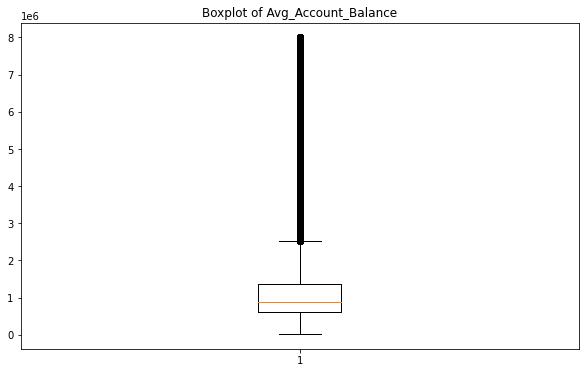

In [ ]:
plt.boxplot(duplicate_data['Avg_Account_Balance'])
plt.title("Boxplot of Avg_Account_Balance")

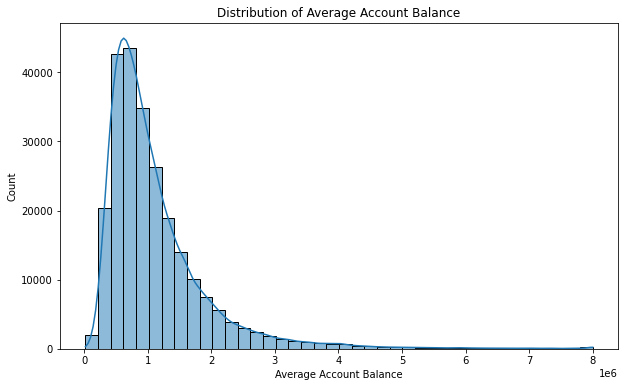

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(duplicate_data['Avg_Account_Balance'], bins=40, kde=True)
plt.xlabel('Average Account Balance')
plt.ylabel('Count')
plt.title('Distribution of Average Account Balance')
plt.show()

In [ ]:
#SQUAREROOT TRANSFORMATION
credit_card_data1 = data.copy()
# Square root transformation on the "avg_account_balance" column
credit_card_data1['Avg_Account_Balance_sqrt'] = np.sqrt(credit_card_data1['Avg_Account_Balance'])

# Print the DataFrame to observe the transformation
print(credit_card_data1)

        Age  Region_Code  Channel_Code  Vintage  Avg_Account_Balance  Is_Lead  \
0        73          268             3       43              1045696        0   
1        30          277             1       32               581988        0   
2        56          268             3       26              1484315        0   
3        34          270             1       19               470454        0   
4        30          282             1       33               886787        0   
...     ...          ...           ...      ...                  ...      ...   
245720   51          284             3      109              1925586        0   
245721   27          268             1       15               862952        0   
245722   26          281             1       13               670659        0   
245723   28          273             1       31               407504        0   
245724   29          269             1       21              1129276        0   

        Gender_Male  Occupa

Text(0.5, 1.0, 'Box Plot of sqrt-Transformed Avg_Account_Balance')

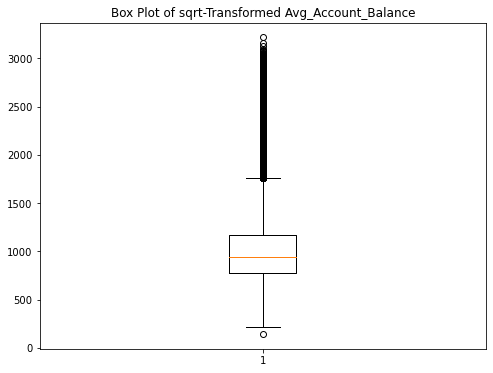

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(credit_card_data1['Avg_Account_Balance_sqrt'])
plt.title('Box Plot of sqrt-Transformed Avg_Account_Balance')

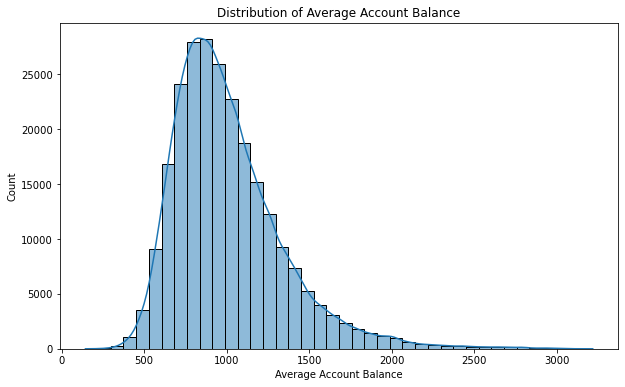

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(credit_card_data1['Avg_Account_Balance_sqrt'], bins=40, kde=True)
plt.xlabel('Average Account Balance')
plt.ylabel('Count')
plt.title('Distribution of Average Account Balance')
plt.show()

In [ ]:
#TRIMMING

In [ ]:
#TRIMMING



# Define the lower and upper percentiles for trimming
lower_percentile = 5
upper_percentile = 95

# Calculate the percentiles
lower_bound = np.percentile(data['Avg_Account_Balance'], 5)
upper_bound = np.percentile(data['Avg_Account_Balance'], 95)

# Trim the outliers and store the trimmed data in a new DataFrame
trimmed_data = data[(data['Avg_Account_Balance'] >= lower_bound) & (data['Avg_Account_Balance'] <= upper_bound)].copy()

# Alternatively, you can replace the original column with the trimmed values
#data[column_name] = data[column_name].clip(lower_bound, upper_bound)

# Show the updated DataFrame with trimmed data
print(trimmed_data.head())

   Age  Region_Code  Channel_Code  Vintage  Avg_Account_Balance  Is_Lead  \
0   73          268             3       43              1045696        0   
1   30          277             1       32               581988        0   
2   56          268             3       26              1484315        0   
3   34          270             1       19               470454        0   
4   30          282             1       33               886787        0   

   Gender_Male  Occupation_Other  Occupation_Salaried  \
0          0.0               1.0                  0.0   
1          0.0               0.0                  1.0   
2          0.0               0.0                  0.0   
3          1.0               0.0                  1.0   
4          0.0               0.0                  1.0   

   Occupation_Self_Employed  Is_Active_Yes  Credit_Product_Yes  
0                       0.0            0.0                 0.0  
1                       0.0            0.0                 0.0  
2    

In [ ]:
trimmed_data

,Age,Region_Code,Channel_Code,Vintage,Avg_Account_Balance,Is_Lead,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Is_Active_Yes,Credit_Product_Yes
0,73,268,3,43,1045696,0,0.0,1.0,0.0,0.0,0.0,0.0
1,30,277,1,32,581988,0,0.0,0.0,1.0,0.0,0.0,0.0
2,56,268,3,26,1484315,0,0.0,0.0,0.0,1.0,1.0,0.0
3,34,270,1,19,470454,0,1.0,0.0,1.0,0.0,0.0,0.0
4,30,282,1,33,886787,0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
245720,51,284,3,109,1925586,0,1.0,0.0,0.0,1.0,0.0,0.0
245721,27,268,1,15,862952,0,1.0,0.0,1.0,0.0,1.0,0.0
245722,26,281,1,13,670659,0,0.0,0.0,1.0,0.0,0.0,0.0
245723,28,273,1,31,407504,0,0.0,0.0,1.0,0.0,0.0,0.0


Text(0.5, 1.0, 'Box plot of Avg_Account_Balance')

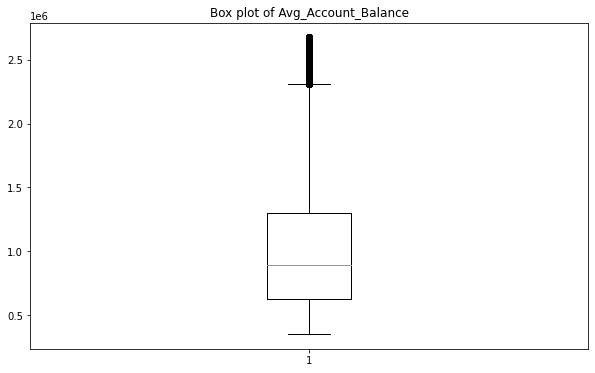

In [ ]:
plt.boxplot(trimmed_data['Avg_Account_Balance'])
plt.title('Box plot of Avg_Account_Balance')

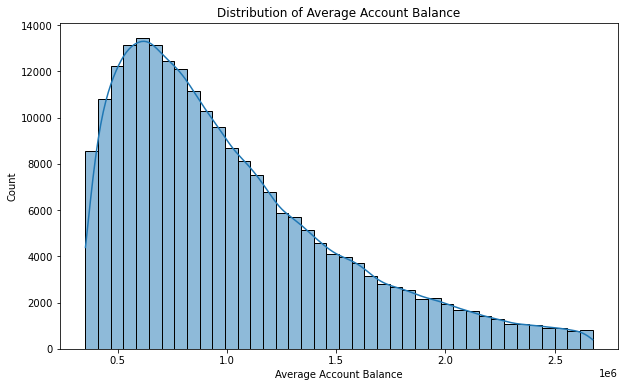

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(trimmed_data['Avg_Account_Balance'], bins=40, kde=True)
plt.xlabel('Average Account Balance')
plt.ylabel('Count')
plt.title('Distribution of Average Account Balance')
plt.show()